In [2]:
import os, glob
import numpy as np
from pathlib import Path

def get_file_list(data_dir_list, file_type, img_path="images", ann_path='bin_masks', inst_path=None, filt=None):
    """
    """

    if isinstance(data_dir_list, str): data_dir_list = [data_dir_list]

    file_list = []

    if file_type == '.png':
        for dir_path in data_dir_list:
            ext = '*.png' if filt is None else f'{filt}.png'
            image_files =  sorted(glob.glob(os.path.join(dir_path, img_path, ext)))

            if ann_path is not None:
                ann_files =  sorted(glob.glob(os.path.join(dir_path, ann_path, ext)))
            else:
                ann_files = [None] * len(image_files)

            if inst_path is not None:
                ext = '*.tif' if filt is None else f'{filt}.tif'
                inst_files =  sorted(glob.glob(os.path.join(dir_path, inst_path, ext)))
            else:
                inst_files = [None] * len(image_files)

            files = list(zip(image_files, ann_files, inst_files))

            file_list.extend(files)
            # file_list.extend(image_files)

        file_list = sorted(file_list, key=lambda x:x[0])       
        # file_list.sort()  # to always ensure same input ordering
    
    else:
        raise NotImplementedError()
    
    # Make sure all file names are the same
    for f in file_list:
        x = [Path(i).stem for i in f if i is not None]
        assert len(set(x)) == 1 and x[0] != '', f"Issue with folder containing {f}"

    return file_list




def get_file_label(gt_dirs, gt=True, img_path=None, ann_path=None, inst_path=None, filt=None):
    file_list = []
    file_labels = []


    for k, v in gt_dirs.items():
        if img_path is not None:
            f = get_file_list(v, ".png", img_path=img_path, ann_path=ann_path, inst_path=inst_path, filt=filt)
        elif gt:
            f = get_file_list(v, ".png", inst_path='inst_masks', filt=filt)
        else:
            f = get_file_list(v, ".png", img_path="samples", ann_path="labels", filt=filt)
        file_list.extend(f)
        file_labels.extend([f"{k}"] * len(f))
    
    return file_list, file_labels



from PIL import Image

def read_img(filename, mode='RGB', size=None):
    img = Image.open(filename)
    img_rgb = img.convert(mode)
    if size is not None:
        if isinstance(size, int): size = (size, size)
        assert img_rgb.size == size
        img_rgb = img_rgb.resize(size)
    img_array = np.array(img_rgb)
    return img_array

def link(src, dst, remove_existing=False):
    if not os.path.exists(dst):
        os.symlink(src, dst)
    elif remove_existing:
        os.unlink(dst)
        os.symlink(src, dst)
    else:
        raise ValueError(f"path {dst} already exists")


In [3]:
import glob

sdm_pardir = "/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6"
sdm_dirs = sorted(glob.glob(os.path.join(sdm_pardir, "*")))

# sdm_dirs = [x for x in sdm_dirs if 'output_train_shuffle_model' in x]

sdm_dirs = {os.path.split(k)[-1] : k for k in sdm_dirs}
print(sdm_dirs)

# sdm_dirs.pop("output_shuffle_model_s1.5_040000")
# sdm_dirs.pop("output_clus4_shuffle_model_s1.5_040000")

sdm_file_list, sdm_label = get_file_label(sdm_dirs, img_path='samples', inst_path='inst_masks')

print("sdm_file_list -> ", len(sdm_file_list))




{'v1.1_output_model_s1.2_040000': '/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.2_040000', 'v1.1_output_model_s1.2_050000': '/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.2_050000', 'v1.1_output_model_s1.4_030000': '/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.4_030000', 'v1.1_output_model_s1.4_040000': '/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.4_040000', 'v1.1_output_model_s1.4_050000': '/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.4_050000', 'v1.1_output_model_s1.5_030000': '/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.5_030000', 'v1.1_output_model_s1.5_040000': '/mnt/dataset/MoNuSeg/out_sdm/patches_vali

In [4]:
sdm_app_list, sdm_app_label = get_file_label(sdm_dirs, img_path='images', inst_path='inst_masks')

train_dirs = {
    "train": ["/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/"],
}

train_file_list, _ = get_file_label(train_dirs, gt=True)


In [12]:
sdm_app_list
train_file_list



[('/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/images/TCGA-18-5592-01Z-00-DX1_000.png',
  '/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/bin_masks/TCGA-18-5592-01Z-00-DX1_000.png',
  '/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/inst_masks/TCGA-18-5592-01Z-00-DX1_000.tif'),
 ('/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/images/TCGA-18-5592-01Z-00-DX1_001.png',
  '/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/bin_masks/TCGA-18-5592-01Z-00-DX1_001.png',
  '/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/inst_masks/TCGA-18-5592-01Z-00-DX1_001.tif'),
 ('/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/images/TCGA-18-5592-01Z-00-DX1_002.png',
  '/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/bin_masks/TCGA-18-5592-01Z-00-DX1_002.png',
  '/mnt/dataset/MoNuS

In [5]:
def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x


In [6]:
from tqdm.notebook import tqdm
from stardist import fill_label_holes

n_channel = 3
axis_norm = (0,1)   # normalize channels independently
# axis_norm = (0,1,2) # normalize channels jointly

img_preprocess = lambda x : normalize(x,1,99.8,axis=axis_norm)
label_preprocess = lambda x : fill_label_holes(x)

x_id = 0
y_id = 2
mask_dtype = 'I'


X_sdm_app = list(map(lambda x: img_preprocess(read_img(x[x_id], 'RGB')), tqdm(sdm_app_list)))
Y_sdm_app = list(map(lambda x: label_preprocess(read_img(x[y_id], mask_dtype)), tqdm(sdm_app_list)))


X_train_file = list(map(lambda x: img_preprocess(read_img(x[x_id], 'RGB')), tqdm(train_file_list)))
Y_train_file = list(map(lambda x: label_preprocess(read_img(x[y_id], mask_dtype)), tqdm(train_file_list)))

  0%|          | 0/1144 [00:00<?, ?it/s]

  0%|          | 0/1144 [00:00<?, ?it/s]

  0%|          | 0/2368 [00:00<?, ?it/s]

  0%|          | 0/2368 [00:00<?, ?it/s]

/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.2_040000/images/TCGA-21-5784-01Z-00-DX1_004.png /mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/images/TCGA-21-5784-01Z-00-DX1_004.png
/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/bin_masks/TCGA-18-5592-01Z-00-DX1_000.png /mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.2_040000/app_labels/TCGA-21-5784-01Z-00-DX1_004.png
/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/MoNuSegTrainingData/inst_masks/TCGA-18-5592-01Z-00-DX1_000.tif /mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.2_040000/app_inst_masks/TCGA-21-5784-01Z-00-DX1_004.tif
/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.2_040000/images/TCGA-21-5784-01Z-00-DX1_017.png /mnt/dat

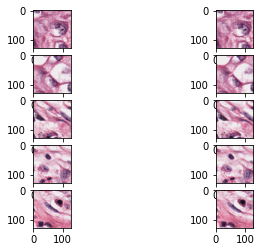

In [8]:
from matplotlib import pyplot as plt

show = True

if show:
    fig, ax = plt.subplots(5, 2)



for i, x in enumerate(X_sdm_app):

    if show and i == 5: break

    err = [np.linalg.norm(x-y) for y in X_train_file]
    ind = np.argmin(err)
    # print(err[ind])
    src_path = train_file_list[ind][0]
    target_path = sdm_app_list[i][0]
    print(src_path, "->", target_path)

    if show:
        ax[i, 0].imshow(read_img(sdm_app_list[i][0]))
        ax[i, 1].imshow(read_img(train_file_list[ind][0]))

    target_path = os.path.split(os.path.split(sdm_app_list[i][0])[0])[0]
    target_name = os.path.join(target_path, "app_labels", f"{Path(sdm_app_list[i][0]).stem}.png")

    src_path = os.path.split(os.path.split(train_file_list[i][0])[0])[0]
    src_name = os.path.join(src_path, "bin_masks", f"{Path(train_file_list[i][0]).stem}.png")
    # src_name = train_file_list[ind][2]

    if not os.path.exists(os.path.join(target_path, "app_labels")):
        os.mkdir(os.path.join(target_path, "app_labels"))

    print(src_name, target_name)

    link(src_name, target_name, remove_existing=True)    


    target_name = os.path.join(target_path, "app_inst_masks", f"{Path(sdm_app_list[i][0]).stem}.tif")
    src_name = os.path.join(src_path, "inst_masks", f"{Path(train_file_list[i][0]).stem}.tif")

    if not os.path.exists(os.path.join(target_path, "app_inst_masks")):
        os.mkdir(os.path.join(target_path, "app_inst_masks"))

    print(src_name, target_name)

    link(src_name, target_name, remove_existing=True)    

plt.show()
